In [1]:
!pip install praw


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 1.6 MB/s eta 0:00:00a 0:00:01m


In [3]:
import praw

# Set up Reddit API credentials
reddit = praw.Reddit(
    client_id="wRg8veOIMDkR3buhyPc1vg",
    client_secret="nY3ozZv1GuUANE6XEyvU6Clz_v9Ztg",
    user_agent="ds_class_project/web_app by Difficult-Bat759"
)


In [30]:

# Extract data from the search results
posts = []
subreddit = reddit.subreddit('all')  # Searching across all subreddits
search_terms = ['pain management gym', 'gym experience', 'pain management', 'return to gym', 'good health', 'workout pain']

for term in search_terms:
    search_results = subreddit.search(term, limit=10000)

    for post in search_results:
#         if any(keyword in post.title.lower() for keyword in ['pain', 'good health', 'experience']):
        posts.append({
            'title': post.title,
            'score': post.score,
            'id': post.id,
            'url': post.url,
            'comments': post.num_comments,
            'created': post.created,
            'body': post.selftext
        })

# Display collected posts
for post in posts[:5]:  # Display first 5 posts
    print(post['title'])


AITA for saying to my wife that I’m the one who gets to make decisions about my niece?
Ashley’s EDS pain is “literally disabling” but anyway here she is at the gym
AITA for refusing to fire my personal trainer per his wife's request?
Patellafemoral pain going on for a year now….haven’t been to gym in that time and feel so lost
LPT: Even if you don’t know CPR, try.


In [31]:
import pandas as pd

# Convert the posts to a DataFrame
df = pd.DataFrame(posts)

df.shape


(1389, 7)

In [32]:
import pandas as pd
import torch
from transformers import pipeline

# Load the sentiment analysis pipeline with GPU support
device = 0 if torch.cuda.is_available() else -1  # Use GPU if available, otherwise use CPU
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", device=device)

# Analyze sentiment for each string in the DataFrame
df["sentiment"] = df["body"].apply(lambda x: sentiment_analyzer(x[:1000])[0]['label'])

# Display the results
df

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


,title,score,id,url,comments,created,body,sentiment
0,AITA for saying to my wife that I’m the one wh...,5432,17vg85i,https://www.reddit.com/r/AmItheAsshole/comment...,3222,1.700006e+09,My (43M) niece (14F) is being raised by my wif...,POSITIVE
1,Ashley’s EDS pain is “literally disabling” but...,77,17wsd4t,https://www.reddit.com/gallery/17wsd4t,181,1.700155e+09,,POSITIVE
2,AITA for refusing to fire my personal trainer ...,14818,ri6l4p,https://www.reddit.com/r/AmItheAsshole/comment...,1458,1.639708e+09,Throwaway bc I don't want this on my main.\n\n...,POSITIVE
3,Patellafemoral pain going on for a year now….h...,7,1fefr4a,https://www.reddit.com/r/Kneesovertoes/comment...,35,1.726075e+09,I first got patellafemoral pain when I started...,NEGATIVE
4,"LPT: Even if you don’t know CPR, try.",11963,s7xojh,https://www.reddit.com/r/LifeProTips/comments/...,727,1.642619e+09,"Context- In Oct 2020, I was training at a juji...",NEGATIVE
...,...,...,...,...,...,...,...,...
1384,Looking for insights from someone who managed ...,3,1chl2vq,https://www.reddit.com/r/ChronicPain/comments/...,0,1.714567e+09,I'm suffering from headaches and drowsiness fo...,POSITIVE
1385,NO PAIN NO GAIN | Epic Badass Workout Motivati...,1,1cq2h5u,https://youtu.be/ivLND_StADA?si=5uzJAWi6BadkKJms,0,1.715500e+09,,POSITIVE
1386,Pain after ab workout,1,1bseueu,https://www.reddit.com/r/adenomyosis/comments/...,4,1.711904e+09,So I (36f) was recently diagnosed with Adeno ...,NEGATIVE
1387,Explain workouts for pain relief like I'm an i...,7,16drtw8,https://www.reddit.com/r/backpain/comments/16d...,22,1.694221e+09,I have upper back pain that mostly hangs aroun...,NEGATIVE


In [33]:
df.to_csv('reddit_pain_management_posts.csv', index=False)

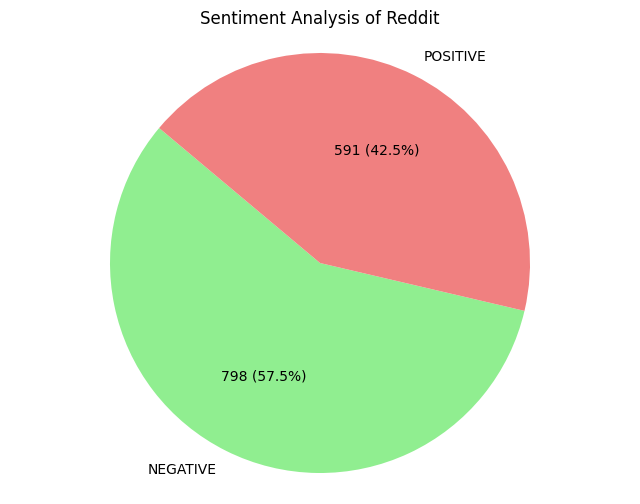

In [35]:
import matplotlib.pyplot as plt

# Summarize sentiments
sentiment_counts = df["sentiment"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))

# Define a function to format the labels to show both count and percentage
def func(pct, allvalues):
    total = sum(allvalues)
    count = int(round(pct / 100 * total))
    return f'{count} ({pct:.1f}%)'

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct=lambda pct: func(pct, sentiment_counts), startangle=140, colors=["lightgreen", "lightcoral"])

plt.title('Sentiment Analysis of Reddit')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
